# Project 1
# DATA 602 - Spring 2022
## Abhinav Reddy Mandadi, Akhila Amaranayani, Megan Bittner, Jonathan Rius

In [ ]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import pytz
from functools import reduce
from numpy import asarray

In [ ]:
# Load data from CSV files

aapl_df = pd.read_csv('AAPL.csv')
btc_df = pd.read_csv('BTC-USD.csv')
spy_df = pd.read_csv('SPY.csv')

In [ ]:
aapl_df.shape # Identify rows of one of the dataframes 

(251, 7)

In [ ]:
aapl_df.head()   #Its easier to read the first five lines of the dataframe (the original dataframe is hundreds of rows)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664207,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952271,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073929,105158200


In [ ]:
btc_df.head() #Its easier to read the first five lines of the dataframe (the original dataframe is hundreds of rows)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


In [ ]:
spy_df.head() #Its easier to read the first five lines of the dataframe (the original dataframe is hundreds of rows)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,375.309998,375.450012,364.820007,368.790009,363.938812,110210800
1,2021-01-05,368.100006,372.500000,368.049988,371.329987,366.445343,66426200
2,2021-01-06,369.709991,376.980011,369.119995,373.549988,368.636108,107997700
3,2021-01-07,376.100006,379.899994,375.910004,379.100006,374.113159,68766800
4,2021-01-08,380.589996,381.489990,377.100006,381.260010,376.244751,71677200


### Problem 1 - Change date format

In [ ]:
aapl_df['Date'] = pd.to_datetime(aapl_df['Date']) # Change date format 

aapl_df['Date'].median()                          #  Median of dataframe with changed format 

Timestamp('2021-07-02 00:00:00')

In [ ]:
btc_df['Date'] = pd.to_datetime(btc_df['Date']) # Change date format 

btc_df['Date'].median()                         #  Median of dataframe with changed format            

Timestamp('2021-07-02 00:00:00')

In [ ]:
spy_df['Date'] = pd.to_datetime(spy_df['Date']) # Change date format 

spy_df['Date'].median()                         # Median of dataframe with changed format 

Timestamp('2021-07-02 00:00:00')

### Problem 2 - Daily Return UDF

In [ ]:
daily_return = lambda x: (x-x.shift(-1))/x.shift(-1) # Function to subtract values of a column from the previous values in the same column

In [ ]:
AAPL = aapl_df                                     # Rename the dataframes for all three csvs

BTC_USD = btc_df

SPY = spy_df

In [ ]:
# Applying daily_return function adding the answer to the data frames in a new column Open_daily_return

AAPL['Open_daily_return'] = daily_return(AAPL['Open'])   

AAPL['Adj_Close_daily_return'] = daily_return(AAPL['Adj Close'])

BTC_USD['Open_daily_return'] = daily_return(BTC_USD['Open'])

BTC_USD['Adj_Close_daily_return'] = daily_return(BTC_USD['Adj Close'])

SPY['Open_daily_return']  = daily_return(SPY['Open'])

SPY['Adj_Close_daily_return']  = daily_return(SPY['Adj Close'])

In [ ]:
# Mean of Open_daily_return 

print("Average of AAPL Open_daily_return is:",AAPL['Open_daily_return'].mean()) 

print("Average of BTC_USD Open_daily_return is:",BTC_USD['Open_daily_return'].mean())

print("Average of SPY Open_daily_return is:",SPY['Open_daily_return'].mean())

Average of AAPL Open_daily_return is: -0.0010550892482577233
Average of BTC_USD Open_daily_return is: -0.0004391311107082082
Average of SPY Open_daily_return is: -0.0009357175538401691


In [ ]:
# Mean of Adj_Close_daily_return weighted by volume

print("The average of Adj_Close_daily_return weighted by volume for AAPL is:",np.average(AAPL['Adj_Close_daily_return'].fillna(0),weights=AAPL['Volume'].fillna(0)))

print("The average of Adj_Close_daily_return weighted by volume for BTC_USD is:",np.average(BTC_USD['Adj_Close_daily_return'].fillna(0),weights=BTC_USD['Volume'].fillna(0)))

print("The average of Adj_Close_daily_return weighted by volume for SPY is:",np.average(SPY['Adj_Close_daily_return'].fillna(0),weights=SPY['Volume'].fillna(0)))

The average of Adj_Close_daily_return weighted by volume for AAPL is: -0.0011943158020578232
The average of Adj_Close_daily_return weighted by volume for BTC_USD is: -0.0005757139036300168
The average of Adj_Close_daily_return weighted by volume for SPY is: -0.0015179465214485805


### Problem 3 - Concatenate Dataframes

In [ ]:
# Create new column ticker to distinguish between the values of 3df  when concatinated

AAPL['ticker'] = "AAPL" 
BTC_USD['ticker'] = "BTC_USD"
SPY['ticker'] = "SPY"

In [ ]:
df = pd.concat([AAPL,BTC_USD,SPY], ignore_index=True) # Concatinating the 3df's

In [ ]:
# Min of Open_daily_return by ticker

print("Min:")
df.groupby(df['ticker'])['Open_daily_return'].min()

Min:


ticker
AAPL      -0.047459
BTC_USD   -0.158020
SPY       -0.020803
Name: Open_daily_return, dtype: float64

In [ ]:
# Max of Open_daily_return by ticker

print("Max:")
df.groupby(df['ticker'])['Open_daily_return'].max()

Max:


ticker
AAPL       0.055059
BTC_USD    0.168454
SPY        0.024205
Name: Open_daily_return, dtype: float64

In [ ]:
# Mean of Open_daily_return by ticker

print("Mean:")
df.groupby(df['ticker'])['Open_daily_return'].mean()

Mean:


ticker
AAPL      -0.001055
BTC_USD   -0.000439
SPY       -0.000936
Name: Open_daily_return, dtype: float64

In [ ]:
df['Percentile_rank']=df['Open_daily_return'].rank(pct=True) # Creating a percentile rank for the column Open_daily_return and storing it in Percentile_rank column

In [ ]:
Q1,Q2,Q3,Q4 = df['Percentile_rank'].quantile([.25, .5, .75, 1]).tolist() # Finding the 4 quartile ranges in the Percentile_rank column

In [ ]:
# No.of observations in the first quartile grouped by ticker

Quartile1 = df.groupby([df['ticker'], df['Percentile_rank']<=Q1])['ticker'].count()

print("The number of observations in the first quartile belonging to AAPL are:",Quartile1.loc['AAPL',True])

print("The number of observations in the first quartile belonging to BTC_USD are:",Quartile1.loc['BTC_USD',True])

print("The number of observations in the first quartile belonging to SPY are:",Quartile1.loc['SPY',True])

The number of observations in the first quartile belonging to AAPL are: 60
The number of observations in the first quartile belonging to BTC_USD are: 137
The number of observations in the first quartile belonging to SPY are: 19


In [ ]:
# No.of observations in the second quartile grouped by ticker

Quartile2 = df.groupby([df['ticker'],df['Percentile_rank']>Q1,df['Percentile_rank']<=Q2])['ticker'].count()

print("The number of observations in the Second quartile belonging to AAPL are:",Quartile2.loc['AAPL', True, True])

print("The number of observations in the Second quartile belonging to BTC_USD are:",Quartile2.loc['BTC_USD', True, True])

print("The number of observations in the Second quartile belonging to SPY are:",Quartile2.loc['SPY', True, True])

The number of observations in the Second quartile belonging to AAPL are: 65
The number of observations in the Second quartile belonging to BTC_USD are: 43
The number of observations in the Second quartile belonging to SPY are: 108


In [ ]:
# No.of observations in the third quartile grouped by ticker

Quartile3 = df.groupby([df['ticker'], df['Percentile_rank']>Q2, df['Percentile_rank']<=Q3])['ticker'].count()

print("The number of observations in the Third quartile belonging to AAPL are:",Quartile3.loc['AAPL', True, True])

print("The number of observations in the Third quartile belonging to BTC_USD are:",Quartile3.loc['BTC_USD', True, True])

print("The number of observations in the Third quartile belonging to SPY are:",Quartile3.loc['SPY', True, True])

The number of observations in the Third quartile belonging to AAPL are: 73
The number of observations in the Third quartile belonging to BTC_USD are: 45
The number of observations in the Third quartile belonging to SPY are: 98


In [ ]:
# No.of observations in the fourth quartile grouped by ticker

Quartile4 = df.groupby([df['ticker'], df['Percentile_rank']>Q3, df['Percentile_rank']<=Q4])['ticker'].count()

print("The number of observations in the fourth quartile belonging to AAPL are:",Quartile4.loc['AAPL', True, True])

print("The number of observations in the fourth quartile belonging to BTC_USD are:",Quartile4.loc['BTC_USD', True, True])

print("The number of observations in the fourth quartile belonging to SPY are:",Quartile4.loc['SPY', True, True])

The number of observations in the fourth quartile belonging to AAPL are: 52
The number of observations in the fourth quartile belonging to BTC_USD are: 139
The number of observations in the fourth quartile belonging to SPY are: 25


### Problem 4 - Pivot Table

In [ ]:
df_pivot = df.pivot_table(index = [df['Date'],df['ticker']],values = 'Open') # USing pivot_table to convert the long table into wide 
df_pivot.head()

Open
Date       ticker               
2021-01-01 BTC_USD  28994.009766
2021-01-02 BTC_USD  29376.455078
2021-01-03 BTC_USD  32129.408203
2021-01-04 AAPL       133.520004
           BTC_USD  32810.949219

In [ ]:
# Before converting 
print("Before converting ",df.shape)
# After converting
print("After converting",df_pivot.shape)

Before converting  (867, 11)
After converting (867, 1)


In [ ]:
df_pivot.groupby(level=['ticker'])['Open'].mean() # average of Open, group by ticker

ticker
AAPL         140.713546
BTC_USD    47402.115663
SPY          425.967610
Name: Open, dtype: float64

### Problem 5 - Outer Join

In [ ]:
# # temp_col = aapl_df.columns+'_AAPL'
# aapl_df.columns = aapl_df.columns+'_AAPL'
# btc_df.columns = btc_df.columns+'_BTC_USD'
spy_df.columns = spy_df.columns+'_SPY'

In [ ]:
# Outer join on the 3 df's

data_frames = [aapl_df,btc_df,spy_df]

df_merge = pd.merge(aapl_df,btc_df,on=['Date'],how='outer',suffixes=['_AAPL','_BTC_USD'])
df_merge = pd.merge(spy_df,df_merge,left_on=['Date_SPY'],right_on=['Date'],how='outer')
# df_merge = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],how='outer'), data_frames)
df_merge.pop('Date_SPY')
df_merge

,Open_SPY,High_SPY,Low_SPY,Close_SPY,Adj Close_SPY,Volume_SPY,Open_daily_return_SPY,Adj_Close_daily_return_SPY,ticker_SPY,Date,...,ticker_AAPL,Open_BTC_USD,High_BTC_USD,Low_BTC_USD,Close_BTC_USD,Adj Close_BTC_USD,Volume_BTC_USD,Open_daily_return_BTC_USD,Adj_Close_daily_return_BTC_USD,ticker_BTC_USD
0,375.309998,375.450012,364.820007,368.790009,363.938812,110210800.0,0.019587,-0.006840,SPY,2021-01-04,...,AAPL,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,0.026078,-0.059440,BTC_USD
1,368.100006,372.500000,368.049988,371.329987,366.445343,66426200.0,-0.004355,-0.005943,SPY,2021-01-05,...,AAPL,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,-0.059875,-0.076904,BTC_USD
2,369.709991,376.980011,369.119995,373.549988,368.636108,107997700.0,-0.016990,-0.014640,SPY,2021-01-06,...,AAPL,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,-0.076567,-0.064684,BTC_USD
3,376.100006,379.899994,375.910004,379.100006,374.113159,68766800.0,-0.011797,-0.005665,SPY,2021-01-07,...,AAPL,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,-0.064697,-0.034967,BTC_USD
4,380.589996,381.489990,377.100006,381.260010,376.244751,71677200.0,0.007252,0.006787,SPY,2021-01-08,...,AAPL,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,88107519480,-0.034492,0.013491,BTC_USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-19,...,NaN,46853.867188,48089.664063,46502.953125,46707.015625,46707.015625,25154053861,0.003143,-0.003696,BTC_USD
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-24,...,NaN,50806.050781,51814.027344,50514.496094,50822.195313,50822.195313,24367912228,-0.000961,0.007780,BTC_USD
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-25,...,NaN,50854.917969,51176.597656,50236.707031,50429.859375,50429.859375,19030650914,0.008452,-0.007472,BTC_USD
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-26,...,NaN,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926,-0.007360,0.003339,BTC_USD


In [ ]:
# Melting the merged df indexed by date and ticker

df_melt = df_merge.melt(id_vars=['Date','ticker_AAPL','ticker_BTC_USD','ticker_SPY']) # 

df_melt.head()

,Date,ticker_AAPL,ticker_BTC_USD,ticker_SPY,variable,value
0,2021-01-04,AAPL,BTC_USD,SPY,Open_SPY,375.309998
1,2021-01-05,AAPL,BTC_USD,SPY,Open_SPY,368.100006
2,2021-01-06,AAPL,BTC_USD,SPY,Open_SPY,369.709991
3,2021-01-07,AAPL,BTC_USD,SPY,Open_SPY,376.100006
4,2021-01-08,AAPL,BTC_USD,SPY,Open_SPY,380.589996


In [ ]:
#Mean of Open by ticker

temp_AAPL = df_melt.groupby(df_melt['variable'] == 'Open_AAPL').mean()

temp_BTC_USD  = df_melt.groupby(df_melt['variable'] == 'Open_BTC_USD').mean()

temp_SPY = df_melt.groupby(df_melt['variable'] == 'Open_SPY').mean()

print("Mean of AAPL is:",float(temp_AAPL.loc[True].values))

print("Mean of BTC_USD is:",float(temp_BTC_USD.loc[True].values))

print("Mean of SPY is:",float(temp_SPY.loc[True].values))

Mean of AAPL is: 140.71354635458167
Mean of BTC_USD is: 47402.11566257534
Mean of SPY is: 425.9676100996016


 The values are same as from before i.e., the mean values from 4<sup>th</sup> solution and from the 5<sup>th</sup>  are same
 

### Problem 6 - 7-Day Moving Average

In [ ]:
#Storing required values separately using temporary variables for simpler computation

tem_SPY = df_melt[df_melt['variable'] == 'Open_daily_return_SPY']

tem_AAPL = df_melt[df_melt['variable'] == 'Open_daily_return_AAPL']

tem_BTC_USD = df_melt[df_melt['variable'] == 'Open_daily_return_BTC_USD']

In [ ]:
index = [i for i in range(len(tem_AAPL))] # index

In [ ]:
# creating 3 different df's to store the computed values of 7-day moving average

Open_daily_return_7day_MA_AAPL = pd.DataFrame(index = index ,columns = ['Open_daily_return_7day_MA','ticker','Date'])

Open_daily_return_7day_MA_BTC_USD = pd.DataFrame(index = index ,columns = ['Open_daily_return_7day_MA','ticker','Date'])

Open_daily_return_7day_MA_SPY = pd.DataFrame(index = index ,columns = ['Open_daily_return_7day_MA','ticker','Date'])

In [ ]:
# Computing and storing the values

for i in range(len(tem_AAPL)-7):
  Open_daily_return_7day_MA_AAPL.loc[i][0] = tem_AAPL['value'][i:i+7].sum()/7
  Open_daily_return_7day_MA_AAPL.loc[i][1] = 'AAPL'
  Open_daily_return_7day_MA_BTC_USD.loc[i][0] = tem_BTC_USD['value'][i:i+7].sum()/7
  Open_daily_return_7day_MA_BTC_USD.loc[i][1] = 'BTC_USD'
  Open_daily_return_7day_MA_SPY.loc[i][0] = tem_SPY['value'][i:i+7].sum()/7
  Open_daily_return_7day_MA_SPY.loc[i][1] = 'SPY'

Open_daily_return_7day_MA_AAPL['Date'] = tem_AAPL['Date'].values
Open_daily_return_7day_MA_BTC_USD['Date'] = tem_BTC_USD['Date'].values
Open_daily_return_7day_MA_SPY['Date'] = tem_SPY['Date'].values

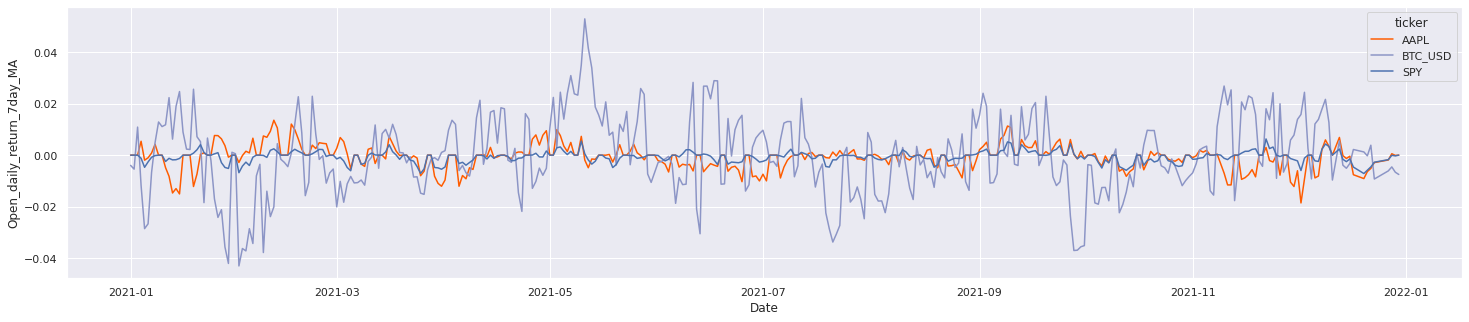

In [ ]:
#Plotting the time series graph between the Open_daily_return_7day_MAin in 3 df's 

sns.set(rc={"figure.figsize":(25, 5)})

sns.lineplot(data=Open_daily_return_7day_MA_AAPL, x="Date", y='Open_daily_return_7day_MA', hue = 'ticker' ,palette = "hot")

sns.lineplot(data=Open_daily_return_7day_MA_BTC_USD, x="Date", y='Open_daily_return_7day_MA', hue = 'ticker' ,palette = "BuPu")

sns.lineplot(data=Open_daily_return_7day_MA_SPY, x="Date", y='Open_daily_return_7day_MA', hue = 'ticker')

### Problem 7 - Inner Join

In [ ]:
#Using inner join to combine the 3 df's

df_inner = pd.merge(aapl_df,btc_df,on=['Date'],how='inner',suffixes=['_AAPL','_BTC_USD'])
df_inner = pd.merge(spy_df,df_inner,left_on=['Date_SPY'],right_on=['Date'],how='inner')
df_inner.pop('Date_SPY')

df_inner.head()

,Open_SPY,High_SPY,Low_SPY,Close_SPY,Adj Close_SPY,Volume_SPY,Open_daily_return_SPY,Adj_Close_daily_return_SPY,ticker_SPY,Date,...,ticker_AAPL,Open_BTC_USD,High_BTC_USD,Low_BTC_USD,Close_BTC_USD,Adj Close_BTC_USD,Volume_BTC_USD,Open_daily_return_BTC_USD,Adj_Close_daily_return_BTC_USD,ticker_BTC_USD
0,375.309998,375.450012,364.820007,368.790009,363.938812,110210800,0.019587,-0.006840,SPY,2021-01-04,...,AAPL,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,0.026078,-0.059440,BTC_USD
1,368.100006,372.500000,368.049988,371.329987,366.445343,66426200,-0.004355,-0.005943,SPY,2021-01-05,...,AAPL,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,-0.059875,-0.076904,BTC_USD
2,369.709991,376.980011,369.119995,373.549988,368.636108,107997700,-0.016990,-0.014640,SPY,2021-01-06,...,AAPL,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,-0.076567,-0.064684,BTC_USD
3,376.100006,379.899994,375.910004,379.100006,374.113159,68766800,-0.011797,-0.005665,SPY,2021-01-07,...,AAPL,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,-0.064697,-0.034967,BTC_USD
4,380.589996,381.489990,377.100006,381.260010,376.244751,71677200,0.007252,0.006787,SPY,2021-01-08,...,AAPL,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,88107519480,-0.034492,0.013491,BTC_USD


In [ ]:
#Shape of outer joined df
print(df_merge.shape)
#Shape of inner joined df
print(df_inner.shape)

(365, 28)
(251, 28)


In [ ]:
df_merge.isna().sum()

Open_SPY                          114
High_SPY                          114
Low_SPY                           114
Close_SPY                         114
Adj Close_SPY                     114
Volume_SPY                        114
Open_daily_return_SPY             115
Adj_Close_daily_return_SPY        115
ticker_SPY                        114
Date                                0
Open_AAPL                         114
High_AAPL                         114
Low_AAPL                          114
Close_AAPL                        114
Adj Close_AAPL                    114
Volume_AAPL                       114
Open_daily_return_AAPL            115
Adj_Close_daily_return_AAPL       115
ticker_AAPL                       114
Open_BTC_USD                        0
High_BTC_USD                        0
Low_BTC_USD                         0
Close_BTC_USD                       0
Adj Close_BTC_USD                   0
Volume_BTC_USD                      0
Open_daily_return_BTC_USD           1
Adj_Close_da

In [ ]:
df_inner.isna().sum()

Open_SPY                          0
High_SPY                          0
Low_SPY                           0
Close_SPY                         0
Adj Close_SPY                     0
Volume_SPY                        0
Open_daily_return_SPY             1
Adj_Close_daily_return_SPY        1
ticker_SPY                        0
Date                              0
Open_AAPL                         0
High_AAPL                         0
Low_AAPL                          0
Close_AAPL                        0
Adj Close_AAPL                    0
Volume_AAPL                       0
Open_daily_return_AAPL            1
Adj_Close_daily_return_AAPL       1
ticker_AAPL                       0
Open_BTC_USD                      0
High_BTC_USD                      0
Low_BTC_USD                       0
Close_BTC_USD                     0
Adj Close_BTC_USD                 0
Volume_BTC_USD                    0
Open_daily_return_BTC_USD         0
Adj_Close_daily_return_BTC_USD    0
ticker_BTC_USD              

In [ ]:
dates = df_merge.loc[df_merge['ticker_AAPL'].isna()].copy()

dates['weekday'] = dates['Date'].dt.weekday

dates

,Open_SPY,High_SPY,Low_SPY,Close_SPY,Adj Close_SPY,Volume_SPY,Open_daily_return_SPY,Adj_Close_daily_return_SPY,ticker_SPY,Date,...,Open_BTC_USD,High_BTC_USD,Low_BTC_USD,Close_BTC_USD,Adj Close_BTC_USD,Volume_BTC_USD,Open_daily_return_BTC_USD,Adj_Close_daily_return_BTC_USD,ticker_BTC_USD,weekday
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,...,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,-0.013019,-0.085694,BTC_USD,4
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-02,...,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,-0.085683,-0.019973,BTC_USD,5
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-03,...,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,-0.020772,0.025338,BTC_USD,6
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-09,...,40788.640625,41436.351563,38980.875000,40254.546875,40254.546875,61984162837,0.013276,0.049486,BTC_USD,5
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-10,...,40254.218750,41420.191406,35984.628906,38356.441406,38356.441406,79980747690,0.049749,0.078438,BTC_USD,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-19,...,46853.867188,48089.664063,46502.953125,46707.015625,46707.015625,25154053861,0.003143,-0.003696,BTC_USD,6
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-24,...,50806.050781,51814.027344,50514.496094,50822.195313,50822.195313,24367912228,-0.000961,0.007780,BTC_USD,4
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-25,...,50854.917969,51176.597656,50236.707031,50429.859375,50429.859375,19030650914,0.008452,-0.007472,BTC_USD,5
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-26,...,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926,-0.007360,0.003339,BTC_USD,6


In [ ]:
dates['weekday'].value_counts().to_frame()

,weekday
5,52
6,52
0,5
4,4
3,1


In [ ]:
dates['Date'].loc[dates['weekday'] < 5]

251   2021-01-01
258   2021-01-18
267   2021-02-15
280   2021-04-02
299   2021-05-31
310   2021-07-05
329   2021-09-06
352   2021-11-25
361   2021-12-24
364   2021-12-31
Name: Date, dtype: datetime64[ns]

It appears that BTC-USD has data for weekends and holidays, while AAPL and SPY do not. For the outer join, the dataframe keeps the weekend and holiday data, while for the inner join this data is dropped.

### Problem 8 - Normalize

 A typical ML practice is to standardize/normalize across all features (sometimes targets as well) (10pt)

Two common scaling practices are 

Min Max Scalar

Standard Scalar

Write your own scalar UDFs, and apply them to the 3 renamed `Open_daily_return` columns from 7.; output the scaled features to new columns. 


In [ ]:
Open_daily_df = df_inner[['Open_daily_return_AAPL','Open_daily_return_BTC_USD','Open_daily_return_SPY']]

Open_daily_df

,Open_daily_return_AAPL,Open_daily_return_BTC_USD,Open_daily_return_SPY
0,0.035922,0.026078,0.019587
1,0.009161,-0.059875,-0.004355
2,-0.004986,-0.076567,-0.016990
3,-0.030733,-0.064697,-0.011797
4,0.025079,-0.034492,0.007252
...,...,...,...
246,-0.007002,-0.042903,-0.007012
247,-0.017040,0.002422,-0.011848
248,0.004628,0.064169,0.001551
249,-0.000780,0.024376,-0.001988


In [ ]:
#Function to calculate the scalar of the data

def NormalizeData(data):
  
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [ ]:
# Apply the function and display head of scaled dataframe 

scaled_x = NormalizeData(Open_daily_df)

scaled_x.head()

,Open_daily_return_AAPL,Open_daily_return_BTC_USD,Open_daily_return_SPY
0,0.813336,0.563899,0.897394
1,0.552294,0.300621,0.365457
2,0.414302,0.249493,0.084723
3,0.163154,0.285851,0.200095
4,0.707570,0.378371,0.623324


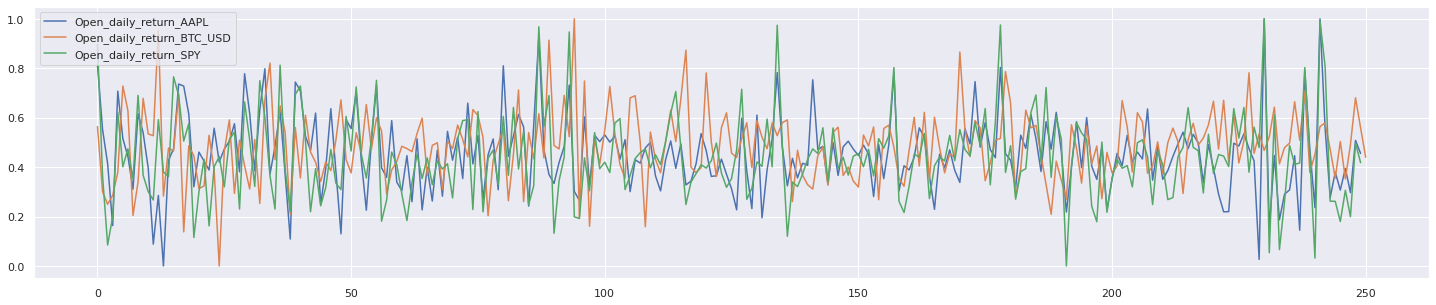

In [ ]:
scaled_x.plot.line() # Visualize scaled dataframe optional 

### Problem 9 - Training/testing sets

Another ML practice to slice data row-wise into training and testing data.

For now, we are going to ignore the fact that the data is time-series, and just
randomly shuffle the data and split them into training and test sets. (20pt)

 #### Randomly shuffle data 

In [ ]:
Shuffled_scaled_x=scaled_x.sample(frac=1)

Shuffled_scaled_x.head()            # Head of shuffled dataframe 

,Open_daily_return_AAPL,Open_daily_return_BTC_USD,Open_daily_return_SPY
23,0.557592,0.387095,0.401140
65,0.399060,0.367088,0.437183
168,0.469916,0.454166,0.528080
41,0.525021,0.609962,0.506593
173,0.745926,0.588249,0.581065


#### Split them into training and testing Sets

In [ ]:
train, test = np.split(Shuffled_scaled_x, [int(.8*len(Shuffled_scaled_x))])

In [ ]:
test.shape

(51, 3)

In [ ]:
train.shape

(200, 3)

## Part 1: Write an additional function 

Write a function that inputs a dataframe, a parameter that determines the size of the training (vs. testing) set, and a seed parameter in case users need to repeat the randomness.

Hint, there are a couple approaches, and feel free to choose either
Shuffle the df, and split the df into ‘training’ and ‘testing’ set 
Use pd.DataFrame.sample()

Output: apply your function to the df of 7, use training = 80%, and set seed =1. return both training and testing data.


In [ ]:
def df_test_train_split(df,train_size):
  # train = df.sample(frac=train_size,random_state=1)
  test = df.sample(frac=1-train_size)
  test = test.reset_index()
  train = df.drop(test.index)
  train = train.reset_index()
  # test = df.drop(train.index)
  # train, test = np.split(df, [int(train_size*len(df))])
  # train, test = train_test_split(df, test_size=1-train_size, random_state=1)
  return train, test

## Part 2: Change the previous function 

Sometimes, one needs to do Stratified splitting. That is, randomly splitting data into train and test within each stratum. Change the function that you just wrote, and make sure it can handle the group by splitting. 

Output: Use df from step 3, let the strata be ticker labels, use training = 80%, and set seed =1. return both training and testing data.

Hint, pd.DataFrame.sample() is probably easier to implement.


In [ ]:
def df_test_train_split_startify(df,train_size):
  # df = df.sample(frac=1,random_state=1)
  test = df.groupby(df['ticker'],group_keys=False).apply(lambda x: x.sample(frac = 1-train_size, random_state = 1))
  train = df.drop(test.index)
  # train, test = np.split(df, [int(train_size*len(df))])
  # train, test = train_test_split(df, test_size=1-train_size, random_state=1, stratify=df['ticker'])
  return train, test

In [ ]:
train1 , test1 = df_test_train_split(df_inner,0.8)
train2 , test2 = df_test_train_split_startify(df,0.8)
len(train1),len(train2),len(test1),len(test2)

(201, 694, 50, 173)

In [ ]:
train1.head()

,index,Open_SPY,High_SPY,Low_SPY,Close_SPY,Adj Close_SPY,Volume_SPY,Open_daily_return_SPY,Adj_Close_daily_return_SPY,ticker_SPY,...,ticker_AAPL,Open_BTC_USD,High_BTC_USD,Low_BTC_USD,Close_BTC_USD,Adj Close_BTC_USD,Volume_BTC_USD,Open_daily_return_BTC_USD,Adj_Close_daily_return_BTC_USD,ticker_BTC_USD
0,50,394.529999,398.119995,393.299988,397.260010,392.034241,97959300,0.000127,0.014764,SPY,...,AAPL,56825.828125,58969.816406,54528.628906,58870.894531,58870.894531,60258313191,-0.035102,0.017490,BTC_USD
1,51,394.480011,396.720001,390.750000,391.480011,386.330292,115349100,0.011799,0.001854,SPY,...,AAPL,58893.078125,60116.250000,54253.578125,57858.921875,57858.921875,55746041000,0.018023,-0.008359,BTC_USD
2,52,389.880005,391.570007,387.149994,389.480011,385.615479,113624500,-0.000385,-0.007922,SPY,...,AAPL,57850.441406,59498.375000,56643.703125,58346.652344,58346.652344,49063873786,-0.008260,0.000566,BTC_USD
3,53,390.029999,394.070007,389.970001,392.589996,388.694580,73778600,-0.004797,0.007933,SPY,...,AAPL,57517.890625,58471.480469,54288.156250,54529.144531,54529.144531,56521454974,0.055148,-0.003833,BTC_USD
4,54,391.910004,393.459991,388.660004,389.500000,385.635254,90686600,0.002327,0.005109,SPY,...,AAPL,54511.660156,55985.441406,53470.695313,54738.945313,54738.945313,56435023914,-0.003634,0.037228,BTC_USD


In [ ]:
test1.head()

,index,Open_SPY,High_SPY,Low_SPY,Close_SPY,Adj Close_SPY,Volume_SPY,Open_daily_return_SPY,Adj_Close_daily_return_SPY,ticker_SPY,...,ticker_AAPL,Open_BTC_USD,High_BTC_USD,Low_BTC_USD,Close_BTC_USD,Adj Close_BTC_USD,Volume_BTC_USD,Open_daily_return_BTC_USD,Adj_Close_daily_return_BTC_USD,ticker_BTC_USD
0,218,465.119995,467.859985,464.109985,467.269989,465.634094,53423300,-0.007511,-0.000342,SPY,...,AAPL,64863.980469,65460.816406,62333.914063,64155.941406,64155.941406,36084893887,0.011002,-0.004864,BTC_USD
1,249,476.980011,478.559998,475.920013,477.480011,477.480011,54503000,-0.001988,0.002772,SPY,...,AAPL,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,0.024376,-0.015546,BTC_USD
2,224,470.890015,473.540009,467.350006,467.570007,465.933075,72762000,0.007855,-0.001324,SPY,...,AAPL,58706.847656,59266.359375,55679.839844,56289.289063,56289.289063,35036121783,0.042666,-0.022230,BTC_USD
3,246,468.750000,472.190002,468.640015,470.600006,470.600006,56439700,-0.007012,-0.013955,SPY,...,AAPL,48626.343750,51332.339844,48065.835938,50784.539063,50784.539063,28223878108,-0.042903,-0.000741,BTC_USD
4,123,427.209991,428.779999,427.179993,428.059998,425.199188,64827900,-0.003871,-0.005506,SPY,...,AAPL,35908.386719,36074.757813,34086.152344,35040.835938,35040.835938,34059036099,0.024900,0.043748,BTC_USD


In [ ]:
train2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return,ticker,Percentile_rank
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900,0.009161,0.034834,AAPL,0.760417
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664207,155088000,-0.004986,-0.032997,AAPL,0.381944
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952271,109578200,-0.030733,-0.008557,AAPL,0.096065
5,2021-01-11,129.190002,130.169998,128.500000,128.979996,128.026611,100384500,0.005370,0.001397,AAPL,0.688657
6,2021-01-12,128.500000,129.690002,126.860001,128.800003,127.847969,91951100,-0.002019,-0.015967,AAPL,0.479167


In [ ]:
test2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return,ticker,Percentile_rank
67,2021-04-12,132.520004,132.850006,130.630005,131.240005,130.464600,91420000,0.000604,-0.023730,AAPL,0.565972
250,2021-12-30,179.470001,180.570007,178.089996,178.199997,177.973251,59773000,NaN,NaN,AAPL,NaN
230,2021-12-01,167.479996,170.300003,164.529999,164.770004,164.560349,152052500,0.055059,0.006168,AAPL,0.961806
161,2021-08-24,149.449997,150.860001,149.149994,149.619995,149.211838,48606400,-0.002403,0.008493,AAPL,0.465278
91,2021-05-14,126.250000,127.889999,125.849998,127.449997,126.912178,81918000,-0.004495,0.009345,AAPL,0.393519
